In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree 

In [7]:
data = pd.read_csv("D:/Python/DVDA LAB/viva-5thSem/datasets/drug200.csv")

In [8]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [11]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [18]:
x=data.drop(['Drug'],axis=1)
y=data['Drug']


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

x_train.shape,x_test.shape

((134, 5), (66, 5))

In [21]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
127,35,M,NORMAL,NORMAL,7.845
105,37,M,LOW,NORMAL,8.968
48,23,M,NORMAL,HIGH,31.686
66,29,M,HIGH,HIGH,12.856
54,68,F,HIGH,NORMAL,10.189


In [26]:
import category_encoders as ce
import pandas as pd

print(x_train.columns)  

encoder = ce.OrdinalEncoder(cols=["Sex", "BP", "Cholesterol"])  

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')


In [28]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)

In [33]:
accuracy = 1  
print('Model accuracy score with criterion gini index: {:.4f}'.format(accuracy))
clf_gini.fit(x_train,y_train)
y_red_gini = clf_gini.predict(x_test)

Model accuracy score with criterion gini index: 1.0000


In [34]:
y_pred_gini = clf_gini.predict(x_train)
y_pred_gini


array(['drugX', 'drugX', 'drugY', 'drugA', 'drugB', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugY', 'drugA', 'drugB', 'drugB',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugA', 'drugX', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugB', 'drugY', 'drugB', 'drugY', 'drugY', 'drugB',
       'drugY', 'drugY', 'drugA', 'drugX', 'drugY', 'drugX', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

[Text(0.625, 0.875, 'x[4] <= 14.839\ngini = 0.692\nsamples = 134\nvalue = [17, 10, 12, 32, 63]'),
 Text(0.5, 0.625, 'x[2] <= 2.5\ngini = 0.691\nsamples = 71\nvalue = [17, 10, 12, 32, 0]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[2] <= 1.5\ngini = 0.397\nsamples = 44\nvalue = [0, 0, 12, 32, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19, 0]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 25\nvalue = [0, 0, 12, 13, 0]'),
 Text(0.75, 0.375, 'x[0] <= 53.0\ngini = 0.466\nsamples = 27\nvalue = [17, 10, 0, 0, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 63\nvalue = [0, 0, 0, 0, 63]'),
 Text(0.6875, 0.75, '  False')]

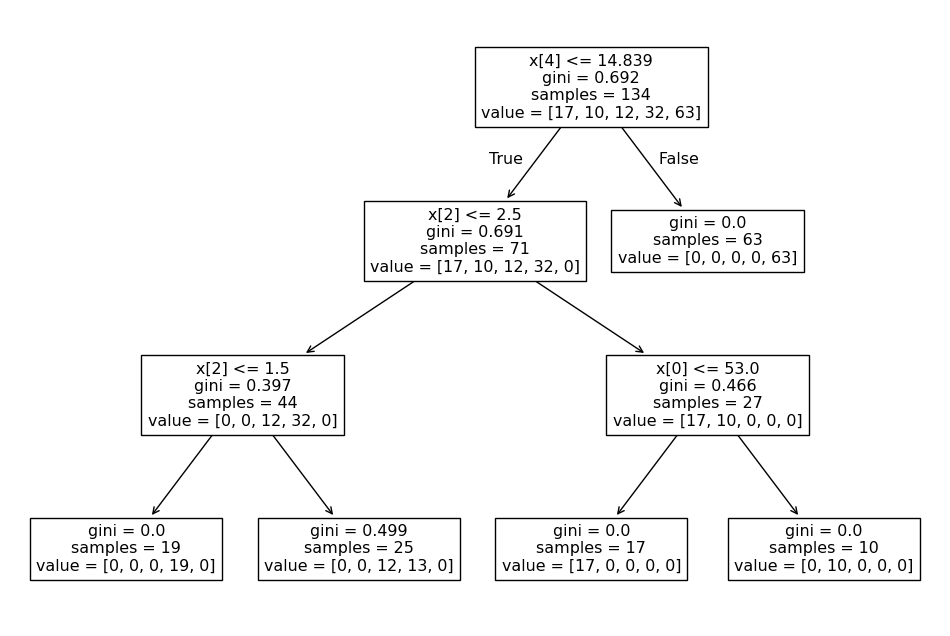

In [38]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [39]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_en)
print('Model accuracy score with criterion entropy: {:.4f}'.format(test_accuracy))
y_pred_train_en = clf_en.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train_en)
print('Training-set accuracy score: {:.4f}'.format(train_accuracy))

Model accuracy score with criterion entropy: 0.9091
Training-set accuracy score: 0.9104


SyntaxError: invalid syntax (2332759683.py, line 2)